In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from CourantFunctions import CourantFunctions as cf
import MathHelper as mh
import pandas as pd
import math
sns.set(rc={'figure.figsize':(25,10)})
#input data
l = 0.01
N = 512
T=75*math.pow(10,-7)
#T=12*math.pow(12,-7)
step = l/N
#gamma and beta
gamma = beta = 0.5
#густина
rho=7500#ok
#механічне напруження
sigma=0
#коефіцієнт теплового розширення
alpha=0.000002#ok
#теплові внутрішні об'ємні сили
w=0
#механічні внутрішні об'ємні сили
f=0
#модуль Юнга
c=139000000000#ok
#коефіцієнт п'єзоелектрики
E=-15.1#ok
#електрична індукція
D=0
#коефіцієнт діелектричної проникливості
g=0.000000646#ok
#задане значення теплового потоку в точці L
def hShtrih(t):#ok
    return 0
#коефіцієнт теплопровідності
Lambda=1.1#ok
#коефіцієнт піроелектрики
pSmall=0.00027#ok 
#почтакове значення тепла T
Tzero = 1/293
#коефіцієнт електропровідності
z = 5*math.pow(10,-12)#ok
#питома теплоємності
cE = 350#ok
#коеф вязкості
a = 4#ok

def sigmaShtrih(t):#ok
    if t<=5*math.pow(10,-7):
        return 5*math.pow(10,6)
    else:
        return 0

def JShtrih(t):#ok
    return 0

In [2]:
#ФУНКЦІЇ куранта
fi = []
fiDerivatives = []
xi = [0]
for i in range(1,N+1):
    xi.append(xi[i-1]+step)

for i in range(0,N+1):
    new_function = cf(i,N,l)
    fi.append(new_function.fi)
    fiDerivatives.append(new_function.fiDerivative)

In [3]:
#формування початкових матриць
def FillMMatrix(koeficient):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (koeficient*fi[0](x)*fi[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (koeficient*fi[0](x)*fi[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (koeficient*fi[i-1](x)*fi[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (koeficient*fi[i](x)*fi[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (koeficient*fi[i](x)*fi[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (koeficient*fi[i](x)*fi[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (koeficient*fi[N-1](x)*fi[N](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (koeficient*fi[N](x)*fi[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return np.array(CMatrixNew)
###
def FillAMatrix(koeficient):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[0](x)*fiDerivatives[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i-1](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[N-1](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return np.array(CMatrixNew)
###
def FillEMatrix(koeficient):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[0](x)*fiDerivatives[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i-1](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[N-1](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (koeficient*fiDerivatives[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
    ###-1 multiplication
    ResMatrix = list((-1)*np.array(CMatrixNew))
        
    return np.array(ResMatrix)
###
def FillSMatrix(koeficient,pytoma,start_temp):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[0](x)*fi[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[0](x)*fi[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[i](x)*fi[i-1](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[i](x)*fi[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[i](x)*fi[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[i](x)*fi[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[N](x)*fi[N-1](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (koeficient*pytoma*start_temp*fi[N](x)*fi[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return np.array(CMatrixNew)
###
def FillYMatrix(c,alpha):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (c*alpha*fi[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (c*alpha*fi[0](x)*fiDerivatives[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i-1](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (c*alpha*fi[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (c*alpha*fi[N](x)*fiDerivatives[N-1](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (c*alpha*fi[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return np.array(CMatrixNew)
###
def FillPMatrix(p):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (p*fi[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (p*fi[1](x)*fiDerivatives[0](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i-1](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (p*fi[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (p*fi[N-1](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (p*fi[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
            
    ###-1 multiplication
    ResMatrix = list((-1)*np.array(CMatrixNew))
        
    return np.array(ResMatrix)
###
def FillKMatrix(koeficient,start_temp):
    CMatrix = list(np.zeros((N+1,3)))
    CMatrix[0][0] = 0
    CMatrix[0][1] = mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[0](x)*fiDerivatives[0](x)),xi[0],xi[1])
    CMatrix[0][2] = mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[0](x)*fiDerivatives[1](x)),xi[0],xi[1])
    
    for i in range(1,N):
        CMatrix[i][0] = mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[i-1](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] = mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i-1],xi[i])
        CMatrix[i][1] += mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[i](x)*fiDerivatives[i](x)),xi[i],xi[i+1])
        CMatrix[i][2] = mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[i](x)*fiDerivatives[i+1](x)),xi[i],xi[i+1])
    
    CMatrix[N][0] = mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[N-1](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][1] = mh.IntegrateGauss(lambda x: (koeficient*start_temp*fiDerivatives[N](x)*fiDerivatives[N](x)),xi[N-1],xi[N])
    CMatrix[N][2] = 0
    
    CMatrixNew = list(np.zeros((N+1,N+1)))
    for i in range(0,N+1):
        CMatrixNew[i][i] = CMatrix[i][1]
        if i > 0:
            CMatrixNew[i][i-1] = CMatrix[i][0]
        if i < N:
            CMatrixNew[i][i+1] = CMatrix[i][2]
        
    return np.array(CMatrixNew)

In [4]:
MMatrix = FillMMatrix(rho)
AMatrix = FillAMatrix(a)
EMatrix = FillEMatrix(E)
ZMatrix = FillAMatrix(z)
SMatrix = FillSMatrix(rho,cE,Tzero)
CMatrix = FillAMatrix(c)
YMatrix = FillYMatrix(c,alpha)
GMatrix = FillAMatrix(g)
PMatrix = FillPMatrix(pSmall)
KMatrix = FillKMatrix(Lambda,Tzero)
#print(pd.DataFrame(MMatrix))
#print(pd.DataFrame(AMatrix))
#print(pd.DataFrame(EMatrix))
#print(pd.DataFrame(CMatrix))
#print(pd.DataFrame(ZMatrix))
#print(pd.DataFrame(SMatrix))
#print(pd.DataFrame(YMatrix))
#print(pd.DataFrame(GMatrix))
#print(pd.DataFrame(PMatrix))
#print(pd.DataFrame(KMatrix))

In [5]:
#формування векторів початкових умов правої частини слар
u0 = np.zeros((N+1))
udot0 = np.zeros((N+1))
p0 = np.zeros((N+1))
thetta0 = np.zeros((N+1))  

In [6]:
dt=T/1200
t = 0
#constructing main matrix
MainMatrix = list(np.zeros((3*(N+1),3*(N+1))))
for i in range(0,N+1):
    for j in range(0,N+1):
        #first row
        MainMatrix[i][j] = MMatrix[i][j] + (dt*gamma)*AMatrix[i][j] + 0.5*dt*dt*beta*CMatrix[i][j]
        MainMatrix[i][j+N+1] = (-1)*dt*gamma*EMatrix.transpose()[i][j]
        MainMatrix[i][j+2*(N+1)] = (-1)*dt*gamma*YMatrix.transpose()[i][j]
        #second row
        MainMatrix[i+N+1][j] = dt*gamma*EMatrix[i][j]
        MainMatrix[i+N+1][j+N+1] = GMatrix[i][j]+(dt*gamma*ZMatrix[i][j])
        MainMatrix[i+N+1][j+2*(N+1)] = PMatrix.transpose()[i][j]
        #third row
        MainMatrix[i+2*(N+1)][j] = dt*gamma*YMatrix[i][j]
        MainMatrix[i+2*(N+1)][j+N+1] = PMatrix[i][j]
        MainMatrix[i+2*(N+1)][j+2*(N+1)] = (SMatrix[i][j]+(dt*gamma)*KMatrix[i][j])#ok
        

MainMatrix[0][0] = pow(10,20)
MainMatrix[N+1][N+1] = pow(10,20)
MainMatrix[2*N+2][2*N+2] = pow(10,20)
print(pd.DataFrame(MainMatrix))

              0         1         2         3         4         5     6     \
0     1.000000e+20 -0.045726  0.000000  0.000000  0.000000  0.000000   0.0   
1    -4.572594e-02  0.237936 -0.045726  0.000000  0.000000  0.000000   0.0   
2     0.000000e+00 -0.045726  0.237936 -0.045726  0.000000  0.000000   0.0   
3     0.000000e+00  0.000000 -0.045726  0.237936 -0.045726  0.000000   0.0   
4     0.000000e+00  0.000000  0.000000 -0.045726  0.237936 -0.045726   0.0   
...            ...       ...       ...       ...       ...       ...   ...   
1534  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
1535  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
1536  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
1537  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
1538  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   

      7     8     9     ...  1529  1530  1531  1532      1533  

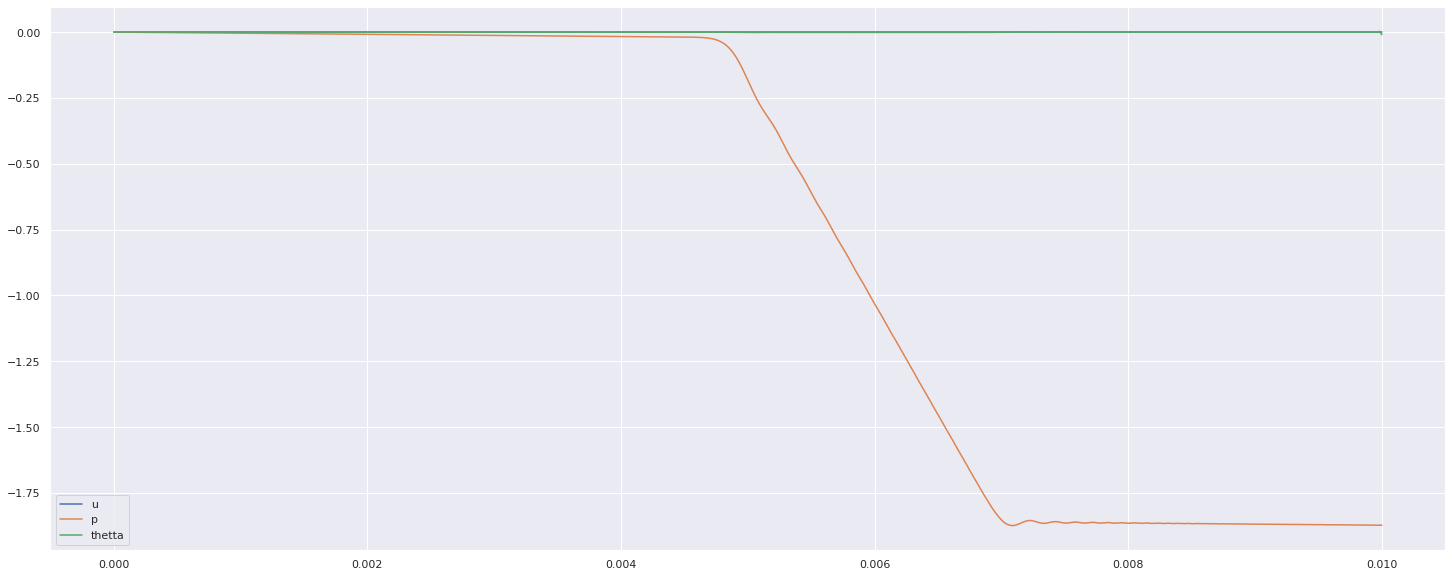

In [7]:
#розвязок однокрокової рекурентної схеми
LJplusHalf = np.zeros((N+1))
RJplusHalf = np.zeros((N+1))
FJplusHalf = np.zeros((N+1))
result = np.zeros(3*(N+1))
while t<=T:
    #формуємо вектори L, R та F за лінійними функціоналами
    for i in range(0,N+1):
        LJplusHalf[i] = sigmaShtrih(t)*fi[i](l)
        RJplusHalf[i] = JShtrih(t)*fi[i](l)
        FJplusHalf[i] = -hShtrih(t)*fi[i](l)
    
    #print("R vec")
    #print(FJplusHalf)
    #print("------------")
    
    #формуємо праву частину слар
    Vec1 = LJplusHalf - AMatrix.dot(udot0) - CMatrix.dot(u0) - dt*gamma*CMatrix.dot(udot0)+EMatrix.transpose().dot(p0)+YMatrix.transpose().dot(thetta0)
    Vec2 = RJplusHalf - EMatrix.dot(udot0)-ZMatrix.dot(p0)
    Vec3 = FJplusHalf - KMatrix.dot(thetta0)-YMatrix.dot(udot0)
    rightSideVec = list(Vec1) + list(Vec2) + list(Vec3)
    #розвязуємо слар
    #result = mh.Gauss(MainMatrix, rightSideVec)
    result = np.linalg.solve(np.array(MainMatrix), np.array(rightSideVec))
    #print(result)
    #відокремлюємо окремі розв'язки з загального
    uKoefsSub = np.zeros((N+1))
    pKoefsSub = np.zeros((N+1))
    thettaKoefsSub = np.zeros((N+1))
    for i in range(0,N+1):
        uKoefsSub[i] = result[i]
        pKoefsSub[i] = result[N+1+i]
        thettaKoefsSub[i] = result[2*N+2+i]
    #print(uKoefsSub)
    #print("--------")
    #print(pKoefsSub)
    #print("--------")
    #print(thettaKoefsSub)
    #print("--------")
    #print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
    #обчислюємо значення векторів для наступного кроку
    u0Next = u0 + dt*udot0 + 0.5*dt*dt*np.array(uKoefsSub)
    p0Next = p0 + dt*np.array(pKoefsSub)
    udot0Next = udot0 + dt*np.array(uKoefsSub)
    thetta0Next = thetta0 + dt*np.array(thettaKoefsSub)
    #print("u0")
    #print(u0)
    #print("u0Next")
    #print(u0Next)
    #print("--------------")
    #оновлюємо значення векторів
    u0 = u0Next
    p0 = p0Next
    udot0 = udot0Next
    thetta0 = thetta0Next
    
    if t>12*math.pow(10,-7):
        plt.plot(xi,u0,label = 'u')
        plt.plot(xi,p0,label = 'p')
        plt.plot(xi,thetta0,label = 'thetta')
        plt.legend()
        plt.show()
        break
        
    t+=dt

In [8]:
print(np.array([[1,2],[3,4]]).transpose())

[[1 3]
 [2 4]]


In [9]:
uKoefsFinal = np.zeros((N+1))
pKoefsFinal = np.zeros((N+1))
thettaKoefsFinal = np.zeros((N+1))
for i in range(0,N+1):
    uKoefsFinal[i] = result[i]
    pKoefsFinal[i] = result[N+1+i]
    thettaKoefsFinal[i] = result[2*N+2+i]
#print(f"final result:")
#print("u koefs:")
#print(uKoefsFinal)
#print("p koefs:")
#print(pKoefsFinal)
#print("thetta koefs:")
#print(thettaKoefsFinal)

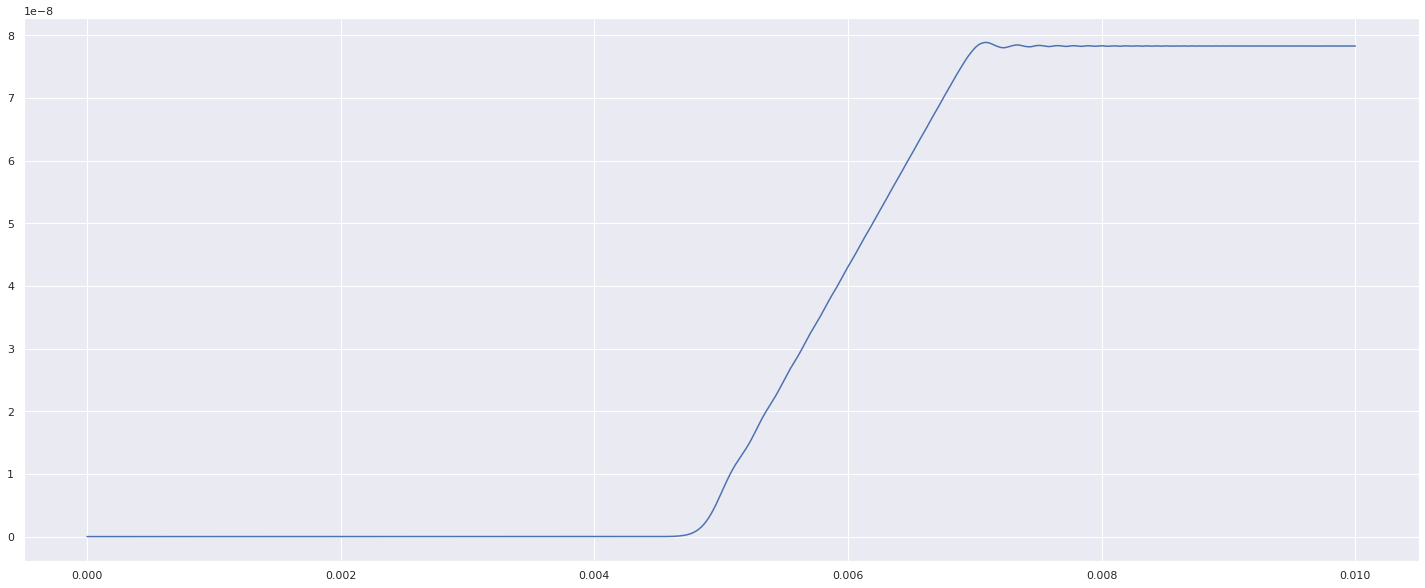

In [10]:
plt.plot(xi,u0)

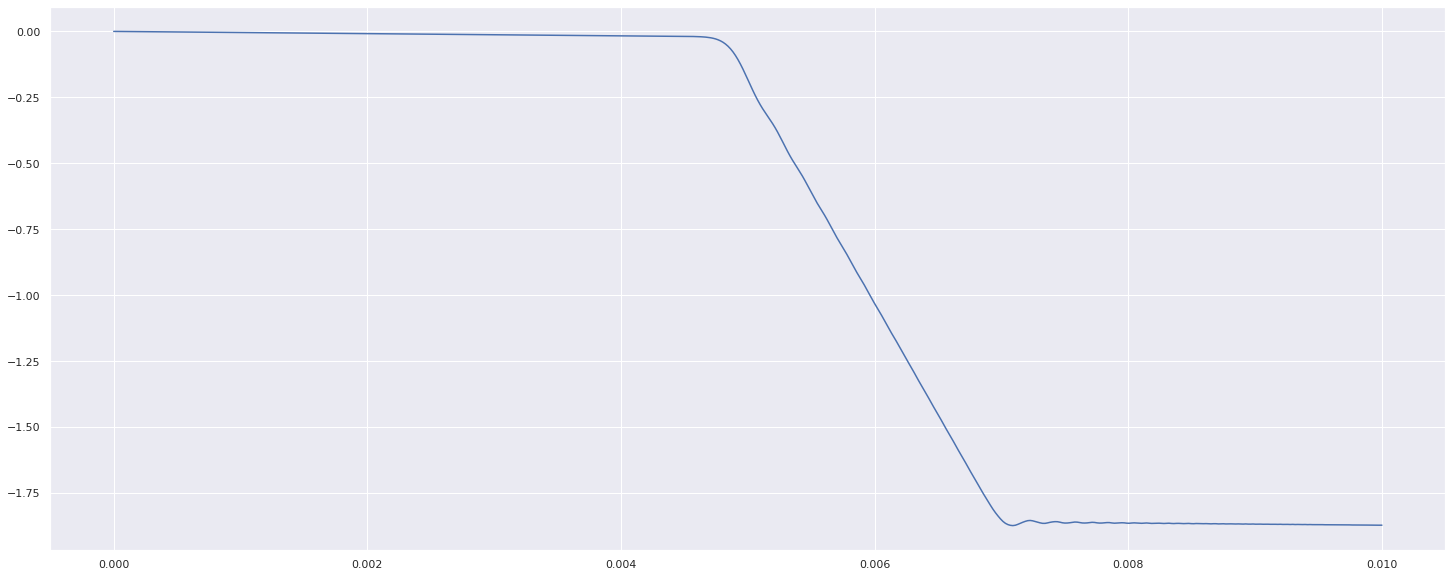

In [11]:
plt.plot(xi,p0)

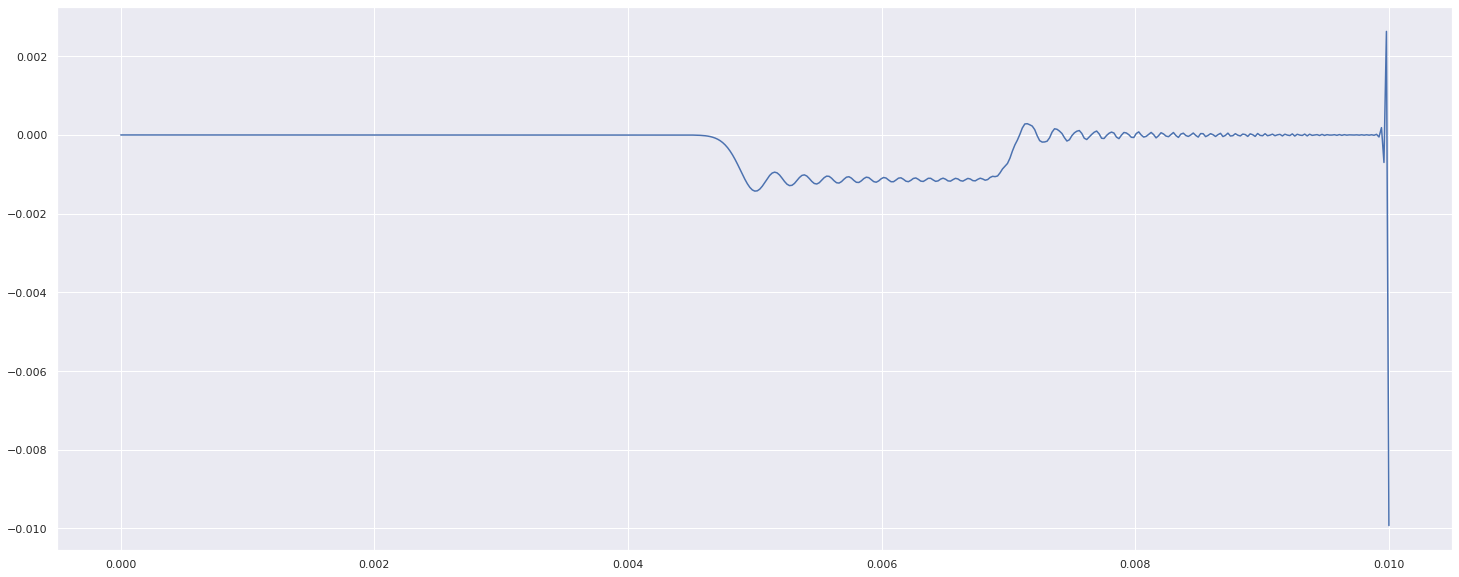

In [12]:
plt.plot(xi,thetta0)